In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_main=pd.read_csv('rewards_final_main.csv')
df_dqn=pd.read_csv('rewards_only_dqn_stateless_cartpole_final.csv')

In [3]:
df_dqn

,Unnamed: 0,0
0,0,2219.0
1,1,2392.0
2,2,2219.0
3,3,2339.0
4,4,2277.0
...,...,...
566,566,2853.0
567,567,1942.0
568,568,1075.0
569,569,3109.0


In [4]:
df_main.columns=['epochs','reward']
df_dqn.columns=['epochs','reward']

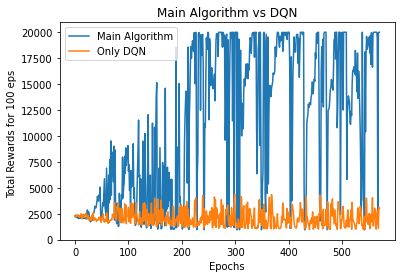

In [5]:

plt.plot(df_main['epochs'],df_main['reward'],label="Main Algorithm")
plt.plot(df_dqn['epochs'],df_dqn['reward'],label="Only DQN")

plt.xlabel('Epochs')
plt.ylabel('Total Rewards for 100 eps ')
plt.title("Main Algorithm vs DQN")
plt.legend()
plt.rcParams['figure.figsize']=[20,10]
plt.show()

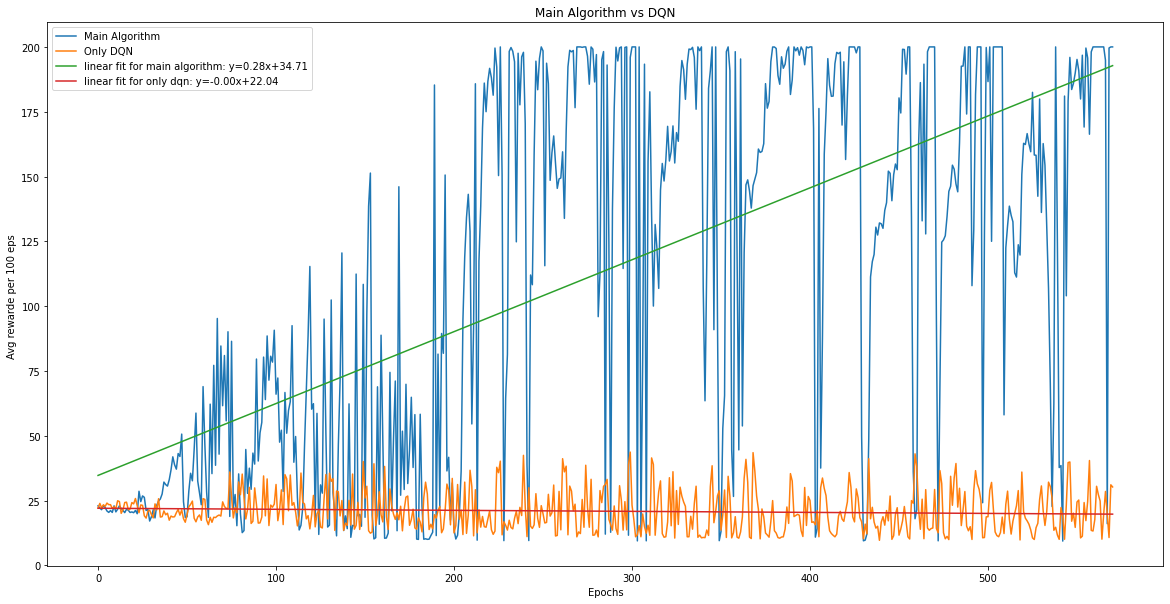

In [6]:

x=np.arange(0,571,1)
m1,b1=np.polyfit(x,df_main['reward']/100,1)
m2,b2=np.polyfit(x,df_dqn['reward']/100,1)
plt.plot(df_main['epochs'],df_main['reward']/100,label="Main Algorithm")
plt.plot(df_dqn['epochs'],df_dqn['reward']/100,label="Only DQN")
plt.plot(x,m1*x+b1,label="linear fit for main algorithm: y={:.2f}x+{:.2f}".format(m1,b1))
plt.plot(x,m2*x+b2,label="linear fit for only dqn: y={:.2f}x+{:.2f}".format(m2,b2))
plt.xlabel('Epochs')
plt.ylabel('Avg rewarde per 100 eps ')
plt.title("Main Algorithm vs DQN")
plt.legend()
plt.rcParams['figure.figsize']=[20,10]
plt.show()

In [7]:
df_dqn['avg_reward']=df_dqn['reward']/100
df_main['avg_reward']=df_main['reward']/100
df_dqn['moving_avg']=df_dqn.avg_reward.rolling(100,min_periods=1).mean()
df_main['moving_avg']=df_main.avg_reward.rolling(100,min_periods=1).mean()




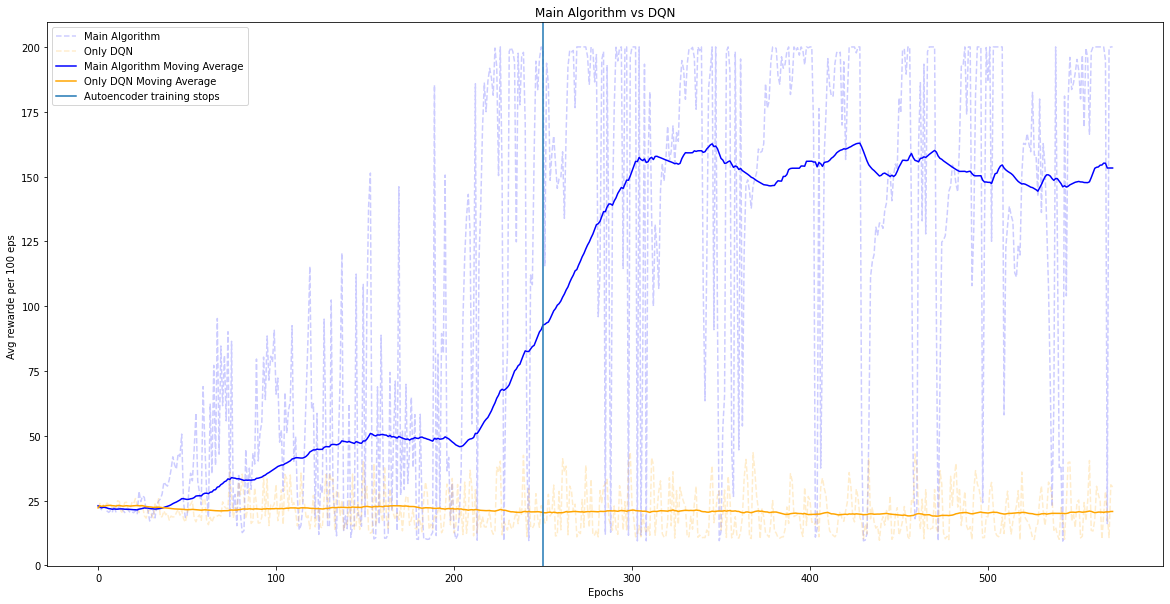

In [8]:

x=np.arange(0,571,1)
m1,b1=np.polyfit(x,df_main['reward']/100,1)
m2,b2=np.polyfit(x,df_dqn['reward']/100,1)
plt.plot(df_main['epochs'],df_main['avg_reward'],label="Main Algorithm",linestyle='dashed',alpha=0.2,color='blue')
plt.plot(df_dqn['epochs'],df_dqn['avg_reward'],label="Only DQN",linestyle='dashed',alpha=0.2,color='orange')
plt.plot(df_main['epochs'],df_main['moving_avg'],label="Main Algorithm Moving Average",color='blue')
plt.plot(df_dqn['epochs'],df_dqn['moving_avg'],label="Only DQN Moving Average",color='orange')
#plt.plot(x,m1*x+b1,label="linear fit for main algorithm: y={:.2f}x+{:.2f}".format(m1,b1),color='navy')
#plt.plot(x,m2*x+b2,label="linear fit for only dqn: y={:.2f}x+{:.2f}".format(m2,b2),color='red')
plt.axvline(x=250,label='Autoencoder training stops')
plt.xlabel('Epochs')
plt.ylabel('Avg rewarde per 100 eps ')
plt.title("Main Algorithm vs DQN")
plt.legend()
plt.rcParams['figure.figsize']=[20,10]
plt.show()

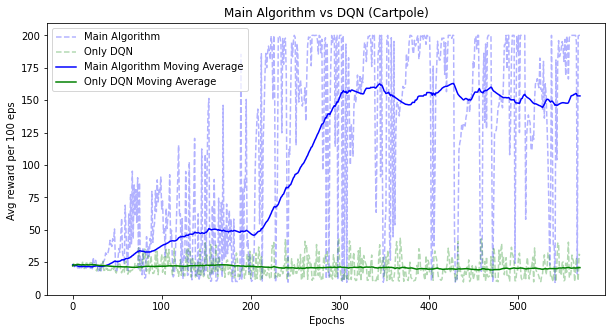

In [9]:
plt.rcParams['figure.figsize']=[10,5]
x=np.arange(0,571,1)
m1,b1=np.polyfit(x,df_main['reward']/100,1)
m2,b2=np.polyfit(x,df_dqn['reward']/100,1)
plt.plot(df_main['epochs'],df_main['avg_reward'],label="Main Algorithm",linestyle='dashed',alpha=0.3,color='blue')
plt.plot(df_dqn['epochs'],df_dqn['avg_reward'],label="Only DQN",linestyle='dashed',alpha=0.3,color='green')
plt.plot(df_main['epochs'],df_main['moving_avg'],label="Main Algorithm Moving Average",color='blue')
plt.plot(df_dqn['epochs'],df_dqn['moving_avg'],label="Only DQN Moving Average",color='green')
#plt.plot(x,m1*x+b1,label="linear fit for main algorithm: y={:.2f}x+{:.2f}".format(m1,b1),color='navy')
#plt.plot(x,m2*x+b2,label="linear fit for only dqn: y={:.2f}x+{:.2f}".format(m2,b2),color='red')
#plt.axvline(x=250,label='Autoencoder training stops')
plt.xlabel('Epochs')
plt.ylabel('Avg reward per 100 eps ')
plt.title("Main Algorithm vs DQN (Cartpole)")
plt.legend()
plt.savefig("cartpole_new.png")
#plt.rcParams['figure.figsize']=[20,10]
plt.show()
